# 2019-yil uchun Hipermarketdagi savdo holati

In [79]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [80]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://raw.githubusercontent.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/main/Hipermarket.csv", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,ANNA ZARADNA 1AD ZAPASKA YER SILEN,"Yuvish vositalari, tozalagichlar",4.80,2019-08-14,False
1,SOKOLAD KG,Shirinliklar,4.35,2019-08-14,False
2,YORK QUBKA KUXONNAYA 3 ART NR 031010,"Yuvish vositalari, tozalagichlar",1.02,2019-08-14,False
3,POLTINO 400GR ALBALI TUMSUZ DONDURULMUS POSET,Mevalar,5.30,2019-09-12,False
4,SOKOLAD SNICKERS ASSORTI KG,Shirinliklar,14.90,2019-09-12,False
5,LAV KLASIK 20020 CAY TABAGI 6LI,Maishiy buyumlar,4.30,2019-09-12,False
6,LUKOMORYE 150GR PENDIR QAYMAQLI,Pishloqlar,2.50,2019-09-12,False
7,KOLBASA OVQAT SERVELAT 4 IPLI KG,Kolbasa va sosiskalar,10.75,2019-09-12,False
8,COLIBRI 40GR VAFLI CIYELEKLI,Shirinliklar,0.25,2019-09-12,False
9,MARMELAD ELVAN FRU JELLY KG,Shirinliklar,2.20,2019-09-12,False


In [81]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20297 entries, 0 to 20296
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20297 non-null  object 
 1   mahsulot_turi   20297 non-null  object 
 2   mahsulot_narhi  20297 non-null  float64
 3   sotilgan_vaqti  20297 non-null  object 
 4   bonus_karta     20297 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 654.2+ KB


In [82]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [83]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20297 entries, 0 to 20296
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20297 non-null  object        
 1   mahsulot_turi   20297 non-null  object        
 2   mahsulot_narhi  20297 non-null  float64       
 3   sotilgan_vaqti  20297 non-null  datetime64[ns]
 4   bonus_karta     20297 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 654.2+ KB


In [84]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

1776
1898
2060
1994
2142
2059
2304
2182
1992
1877
13
0


In [107]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

1776
1898
2060
1994
2142
2059
2304
2182
1992
1877
0
0


In [86]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,ANNA ZARADNA 1AD ZAPASKA YER SILEN,"Yuvish vositalari, tozalagichlar",4.80,2019-08-14,False
1,SOKOLAD KG,Shirinliklar,4.35,2019-08-14,False
2,YORK QUBKA KUXONNAYA 3 ART NR 031010,"Yuvish vositalari, tozalagichlar",1.02,2019-08-14,False
3,POLTINO 400GR ALBALI TUMSUZ DONDURULMUS POSET,Mevalar,5.30,2019-09-12,False
4,SOKOLAD SNICKERS ASSORTI KG,Shirinliklar,14.90,2019-09-12,False
...,...,...,...,...,...
20292,JAN MIKROFIBRI 40*40CM 3AD BEZ METBEX UCUN,"Yuvish vositalari, tozalagichlar",1.83,2019-03-08,False
20293,PAN COFFEE 20GR KOFE ORIGINAL,"Kofe, kakao va h.k",0.25,2019-03-08,False
20294,TEB PLASTIK BOSQAB BOYUK 6-LI DIPLOMAT,Plastik idishlar,2.88,2019-06-19,True
20295,PRESIDENT 50GR PENDIR VETCINALI,Pishloqlar,0.73,2019-06-19,True


In [87]:
#9 2019-yilda "Hipermarket" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4685
Maishiy buyumlar,1110
"Yuvish vositalari, tozalagichlar",963
Mevali sharbatlar,919
Idish-tovoq,807
...,...
Tayyor ovqatlar,18
Kefir,17
Shampan,10
Muzlatilgan mahsulotlar,5


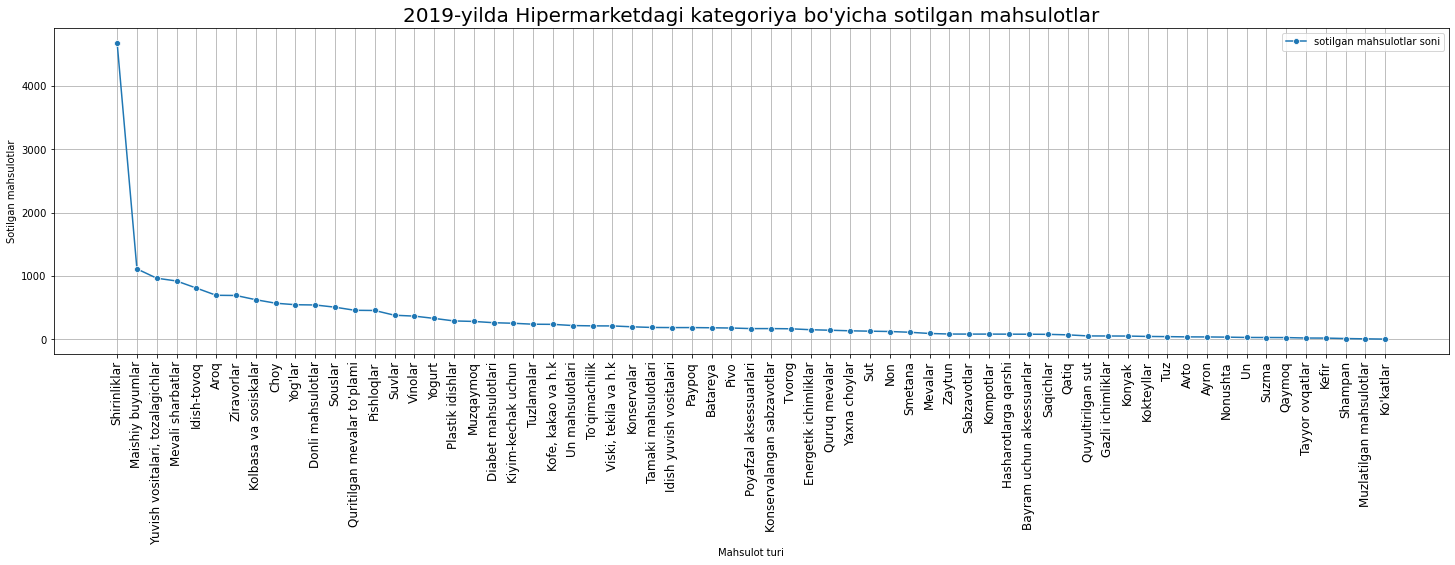

In [88]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda Hipermarketdagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [89]:
#10 2019-yilda "Hipermarket" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10275.21
Avto,217.19
Ayron,25.56
Batareya,819.63
Bayram uchun aksessuarlar,225.47
...,...
Yog'lar,5104.10
Yogurt,406.85


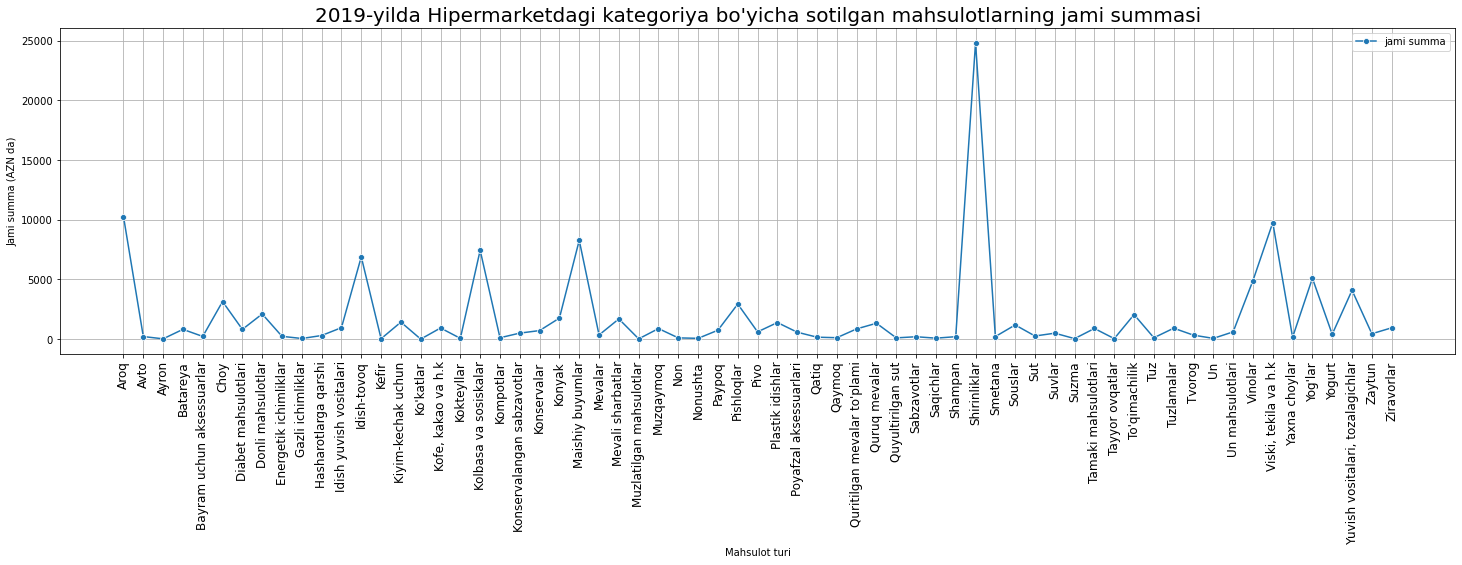

In [90]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda Hipermarketdagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [91]:
#11 2019-yilda "Hipermarket" supermarketida nechta mijoz mahsulotni bonus karta orqali 
#xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10423,9861


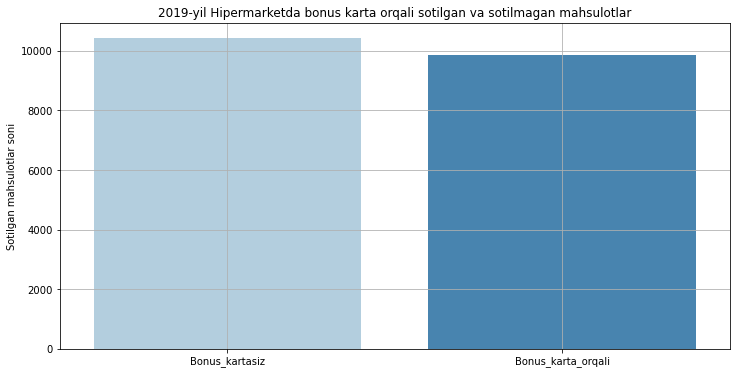

In [92]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil Hipermarketda bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [93]:
#12 2019-yilda "Hipermarket" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,1776
Fevral,1898
Mart,2060
Aprel,1994
May,2142
Iyun,2059
Iyul,2304
Avgust,2182
Sentabr,1992
Oktabr,1877


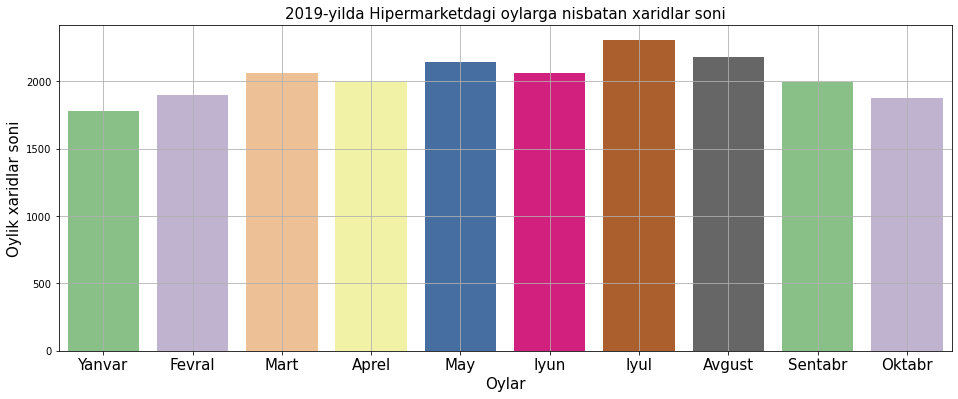

In [94]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda Hipermarketdagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [95]:
#13 2019-yilda "Hipermarket" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2918
Seshanba,2932
Chorshanba,2757
Payshanba,2912
Juma,2905
Shanba,2973
Yakshanba,2887


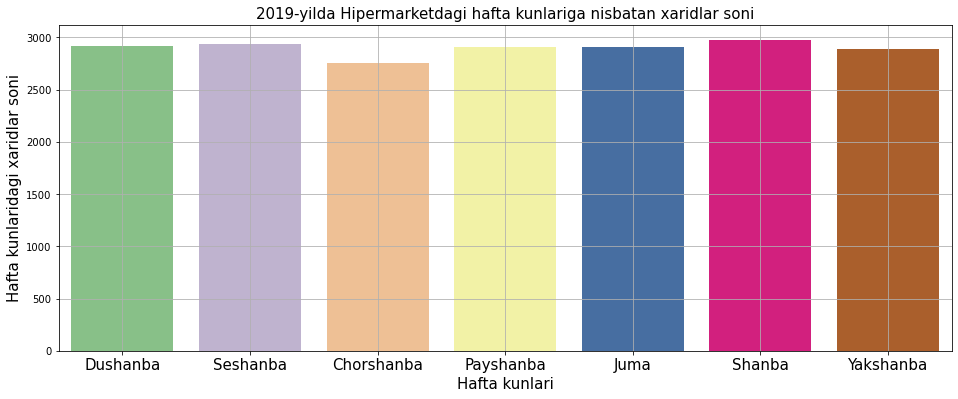

In [96]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda Hipermarketdagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [97]:
#14 2019-yilda "Hipermarket" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,692
2,657
3,636
4,569
5,723
6,696
7,665
8,659
9,684
10,582


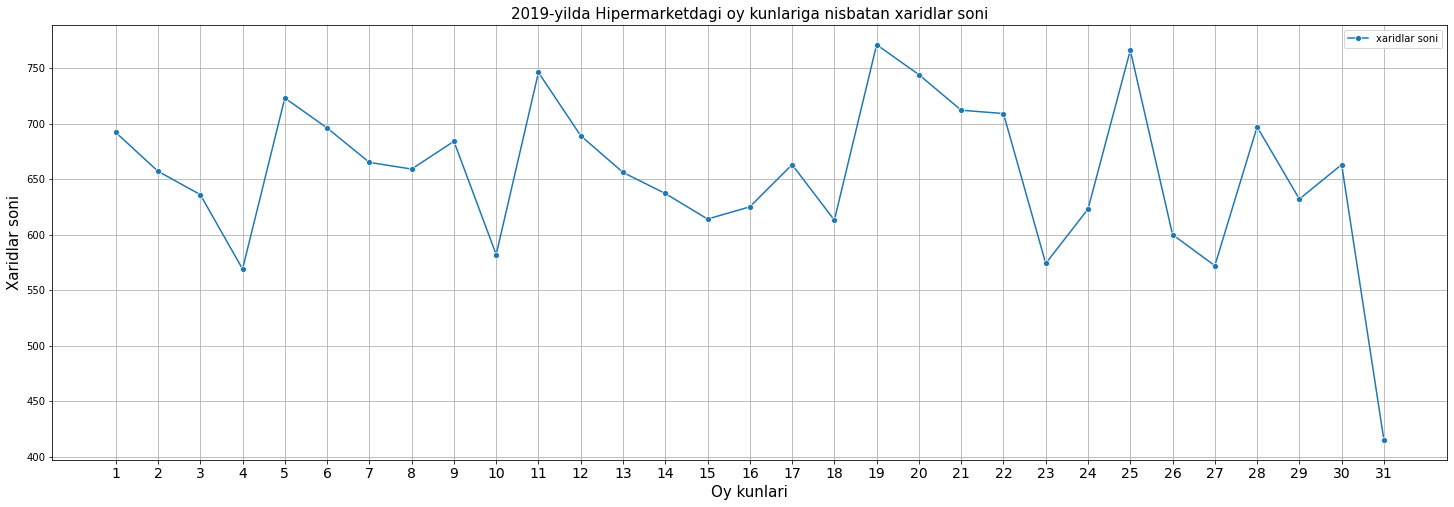

In [108]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda Hipermarketdagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [100]:
#15 2019-yil Hipermarketdagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [101]:
len(oy_sanalari)

310

In [102]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [103]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [104]:
df5

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Yanvar,36,66,64,36,65,65,58,69,36,49,...,59,59,56,114,69,75,45,38,56,21
Fevral,66,47,73,90,77,98,57,42,53,65,...,56,74,59,50,52,38,76,0,0,0
Mart,70,52,27,79,96,65,99,54,95,69,...,53,76,58,70,50,44,81,65,49,94
Aprel,50,63,97,40,49,81,72,62,102,60,...,118,25,47,98,57,63,63,90,51,0
May,54,50,64,59,59,62,71,77,78,61,...,37,41,81,96,70,56,49,82,86,138
Iyun,56,80,57,63,94,58,43,118,71,57,...,66,42,54,65,62,38,118,57,92,0
Iyul,85,99,69,32,64,77,85,78,61,40,...,77,60,57,94,54,80,90,60,97,74
Avgust,95,77,59,29,94,61,84,59,52,73,...,56,42,87,62,74,73,70,100,74,51
Sentabr,94,32,88,89,62,78,35,46,91,65,...,66,72,81,24,74,58,55,90,70,0
Oktabr,86,91,38,52,63,51,61,54,45,43,...,121,83,43,93,38,47,50,50,88,37


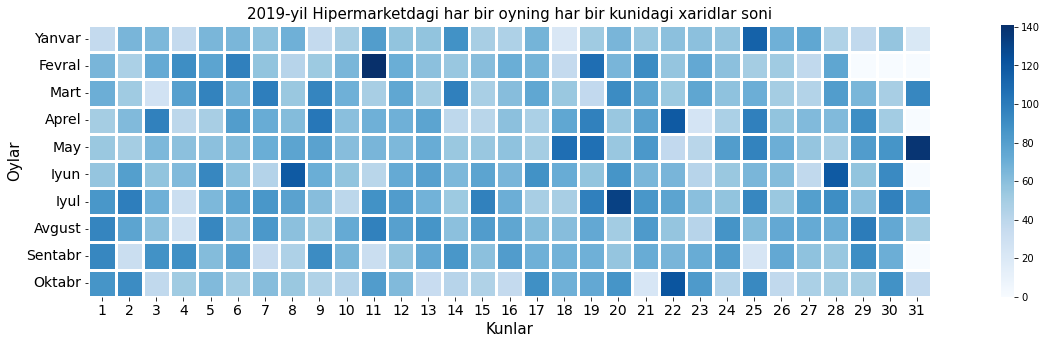

In [105]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil Hipermarketdagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()